In [25]:
# Simulation with  WOFOST parameters Calibrated by Bregaglio and al., 2013 in Morocco. 

import sys, os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data_dir = os.path.join(os.getcwd(), "C1")
import pcse
cropfile = os.path.join(data_dir, 'C1_Bregaglio.crop')
from pcse.fileinput import CABOFileReader
cropdata = CABOFileReader(cropfile)
soilfile = os.path.join(data_dir, 'MO4.soil')
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=0.245, CO2=360)
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'C1_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
from pcse.fileinput import ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider('Climat_2002-2003.xlsx')
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
wofsim.run_till_terminate()
df_results1 = pd.DataFrame(wofsim.get_output())
df_results1 = df_results1.set_index("day")
df_results.tail()


,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW,EVW,EVS
day,,,,,,,,,,,,,
2003-05-23,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.247769,13.627314,0.0,0.058290
2003-05-24,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.246710,13.569024,0.0,0.051582
2003-05-25,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.245772,13.517442,0.0,0.049521
2003-05-26,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.244871,13.467921,0.0,0.054234
2003-05-27,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.243885,13.413687,0.0,0.053236


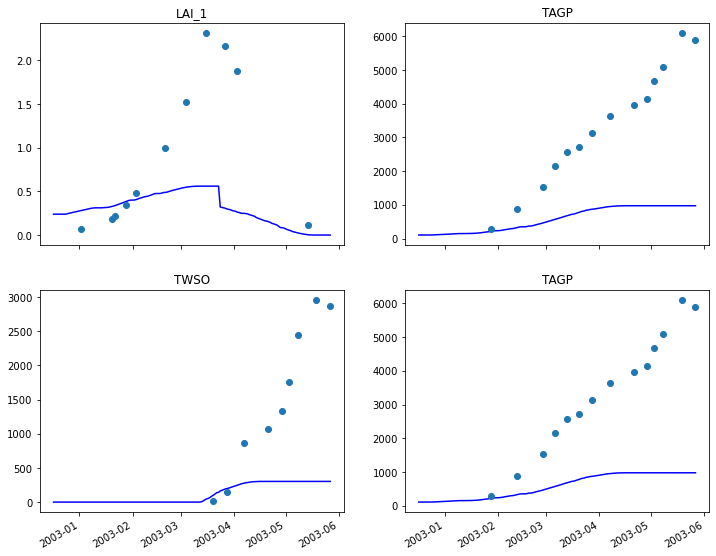

In [26]:
output = wofsim.get_output()
df = pd.DataFrame(output)
df.to_excel("wwh107_C1s.xls")
sortie_C1 = pd.read_excel('/Users/mac/LAI_2002_2003.xlsx') 
result = sortie_C1.set_index("day")
result.tail()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(df_results1.index, df_results1[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["LAI_1", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(result.index, result[var])
    ax.set_title(var)
fig.autofmt_xdate()

In [9]:
# our own calibration with data collected during 2002-2003 in marrakech / Field C1

import sys, os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data_dir = os.path.join(os.getcwd(), "C1")
import pcse
cropfile = os.path.join(data_dir, 'C1.crop')
from pcse.fileinput import CABOFileReader
cropdata = CABOFileReader(cropfile)
soilfile = os.path.join(data_dir, 'MO4.soil')
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=1, CO2=360)
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'C1_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
from pcse.fileinput import ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider('Climat_2002-2003.xlsx')
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pcse/fileinput/yaml_agro_loader.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  r = yaml.load(fp)


,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW,EVW,EVS
day,,,,,,,,,,,,,
2003-05-23,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.247769,13.627314,0.0,0.058290
2003-05-24,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.246710,13.569024,0.0,0.051582
2003-05-25,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.245772,13.517442,0.0,0.049521
2003-05-26,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.244871,13.467921,0.0,0.054234
2003-05-27,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.243885,13.413687,0.0,0.053236


In [10]:
wofsim.get_summary_output()

[{'DVS': 2.0,
  'LAIMAX': 2.3304236187108365,
  'TAGP': 6334.74742085877,
  'TWSO': 2889.6862072632393,
  'TWLV': 1728.428574123487,
  'TWST': 1716.6326394720443,
  'TWRT': 665.3641885309178,
  'CTRAT': 14.927329081043037,
  'RD': 55.0,
  'DOS': datetime.date(2002, 12, 17),
  'DOE': datetime.date(2002, 12, 29),
  'DOA': datetime.date(2003, 3, 31),
  'DOM': datetime.date(2003, 5, 18),
  'DOH': datetime.date(2003, 5, 27),
  'DOV': None}]

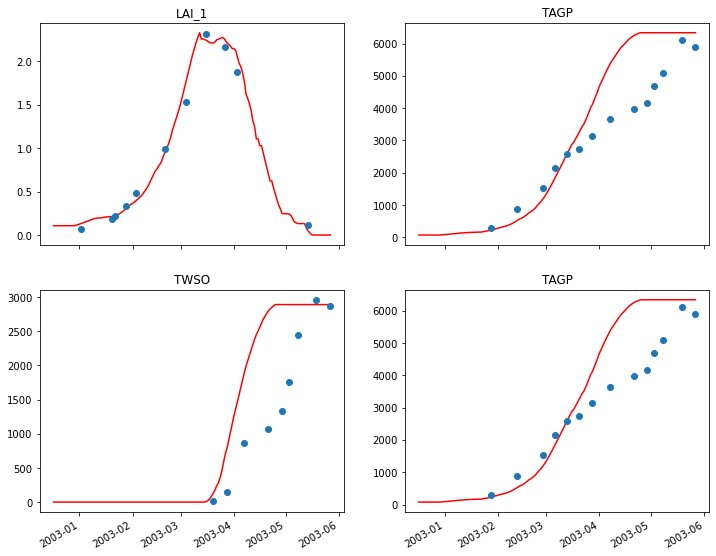

In [11]:
output = wofsim.get_output()
df = pd.DataFrame(output)
df.to_excel("wwh107_C1s.xls")
sortie_C1 = pd.read_excel('/Users/mac/LAI_TAGP_TWSO_2002_2003.xlsx') 
result = sortie_C1.set_index("day")
result.tail()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'r-')
    ax.set_title(var)
for var, ax in zip(["LAI_1", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(result.index, result[var])
    ax.set_title(var)
fig.autofmt_xdate()

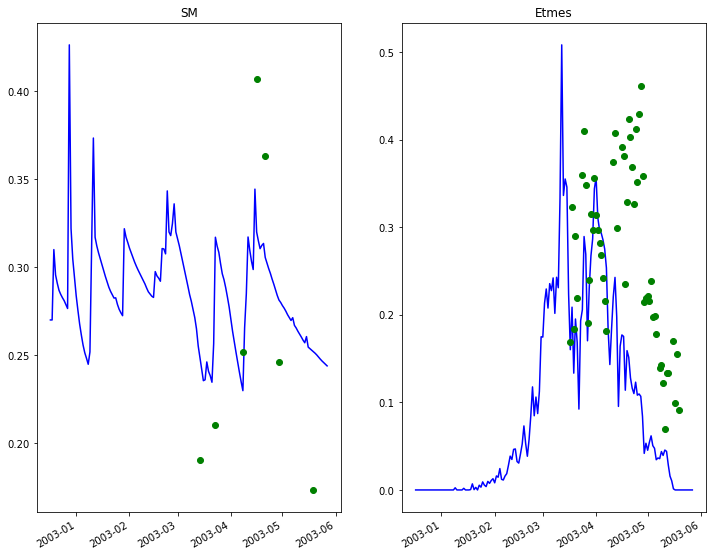

In [12]:
sortie_SM = pd.read_excel('/Users/mac/Soil Moisture Field C1_C2_C3.xlsx', sheet_name="F2-2002-2003_C1") 
result_SM = sortie_SM.set_index("day")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
for var, ax in zip(["SM", "TRA"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["SM", "Etmes"], axes.flatten()):
    ax.plot_date(result_SM.index, result_SM[var], 'go')
    ax.set_title(var)
fig.autofmt_xdate()